In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

Let's start by opening the h5 file that contains our data

In [2]:
datadir = '/Users/cbernet/Datasets/MachineLearning/yelp_dataset'
h5 = h5py.File(datadir+'/data.h5')
d = h5['reviews']
d.shape

(6685900, 251)

The data is as expected: 6685900 reviews, and for each of them, 251 values: 1 rating, and 250 encoded words. 

We can have a look at the first entry. It is a positive one (5 stars in the first column), and it is relatively short. We see the padding. 

In [3]:
print(d[0])

[   5  701    4 4099    7 1419 2684  131  200    4  865 2999  153   77
  530    2  176   99  440  157 1391 2999   36  119    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

To decode this review, we are going to use our Vocabulary class. 

In [4]:
from vocabulary import Vocabulary
vocab = Vocabulary(dbfname=datadir+'/index')
rev1 = d[0,1:]
rev1 = rev1[rev1!=0]
' '.join(vocab.decode(rev1))

"worked with robert on cover couch am happy with finished project price best received ! 'll definitely bring next furniture project their way"

For what we want to do next, we load the whole dataset in memory, it's going to be faster:

In [5]:
d = d[:]

Let's plot the distribution of words in the reviews:

(array([  1038.,    415.,    456.,    625.,   1137.,   2067.,   3770.,
          5885.,   8595.,  12730.,  19733.,  30051.,  42498.,  54014.,
         63518.,  70318.,  74703.,  77849.,  79852.,  81102.,  81616.,
         82577.,  82447.,  82879.,  82454.,  82029.,  82325.,  81952.,
         81991.,  81400.,  80606.,  79993.,  79520.,  78797.,  77786.,
         76975.,  75728.,  74808.,  73589.,  72532.,  71987.,  70475.,
         69459.,  68398.,  66819.,  66239.,  65352.,  64472.,  62884.,
         61763.,  60718.,  59832.,  58268.,  57917.,  56786.,  55615.,
         54894.,  53606.,  52241.,  51857.,  51042.,  50133.,  48626.,
         48158.,  47508.,  46591.,  46082.,  44637.,  43863.,  42726.,
         42674.,  41945.,  40607.,  40464.,  39439.,  39017.,  38253.,
         37479.,  36930.,  36218.,  35726.,  35168.,  34270.,  33643.,
         33390.,  32718.,  32118.,  31660.,  31081.,  30434.,  30157.,
         29397.,  29066.,  28760.,  27960.,  28090.,  27248.,  26754.,
      

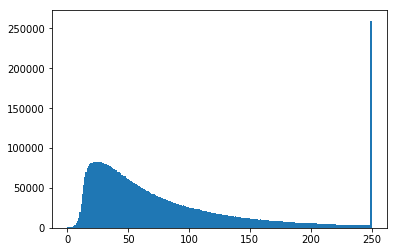

In [6]:
plt.hist(np.count_nonzero(d[:,1:], axis=1), bins=250)

Since we have truncated our reviews at a maximum length of 250, all reviews which had more words end up in the last bin. 

Now let's plot the rating distribution:

(array([1002159.,  542394.,  739280., 1468985., 2933082.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

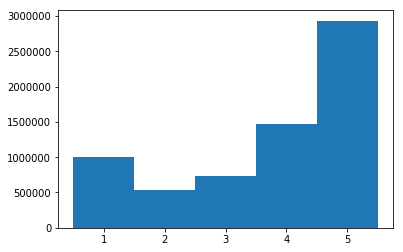

In [7]:
plt.hist(d[:,0], range=(0.5,5.5), bins=5)